1. membaca data file csv

In [2]:
# menghubungkan colab ke gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# memanggil data set lewat gdrive
path = "/content/drive/MyDrive/ML_praktikum/praktikum03"

In [4]:
# membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(path + '/data/day.csv', sep=',')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. menghitung statistik deskriptif

In [20]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


3. data pre-processing

In [21]:
import pandas as pd

df1 = (df[["season", "yr", "mnth", "holiday", "workingday",
           "weathersit", "temp", "atemp", "hum", "windspeed", "cnt"]]
       .rename(columns={
           "season": "musim",
           "yr": "tahun",
           "mnth": "bulan",
           "holiday": "libur",
           "workingday": "hari_kerja",
           "weathersit": "cuaca",
           "temp": "suhu_normal",
           "atemp": "suhu_terasa",
           "hum": "kelembaban",
           "windspeed": "kecepatan_angin",
           "cnt": "jumlah_penyewa"
       })
       .copy())

# 4. Cek 5 data teratas
df1.head()


,musim,tahun,bulan,libur,hari_kerja,cuaca,suhu_normal,suhu_terasa,kelembaban,kecepatan_angin,jumlah_penyewa
0,1,0,1,0,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,1,1,0.226957,0.229270,0.436957,0.186900,1600


4. analisis korelasi

In [22]:
# hitung matriks korelasi
corr_matrix = df1.corr()

print(corr_matrix)

                    musim     tahun     bulan     libur  hari_kerja     cuaca  \
musim            1.000000 -0.001844  0.831440 -0.010537    0.012485  0.019211   
tahun           -0.001844  1.000000 -0.001792  0.007954   -0.002013 -0.048727   
bulan            0.831440 -0.001792  1.000000  0.019191   -0.005901  0.043528   
libur           -0.010537  0.007954  0.019191  1.000000   -0.253023 -0.034627   
hari_kerja       0.012485 -0.002013 -0.005901 -0.253023    1.000000  0.061200   
cuaca            0.019211 -0.048727  0.043528 -0.034627    0.061200  1.000000   
suhu_normal      0.334315  0.047604  0.220205 -0.028556    0.052660 -0.120602   
suhu_terasa      0.342876  0.046106  0.227459 -0.032507    0.052182 -0.121583   
kelembaban       0.205445 -0.110651  0.222204 -0.015937    0.024327  0.591045   
kecepatan_angin -0.229046 -0.011817 -0.207502  0.006292   -0.018796  0.039511   
jumlah_penyewa   0.406100  0.566710  0.279977 -0.068348    0.061156 -0.297391   

                 suhu_norma

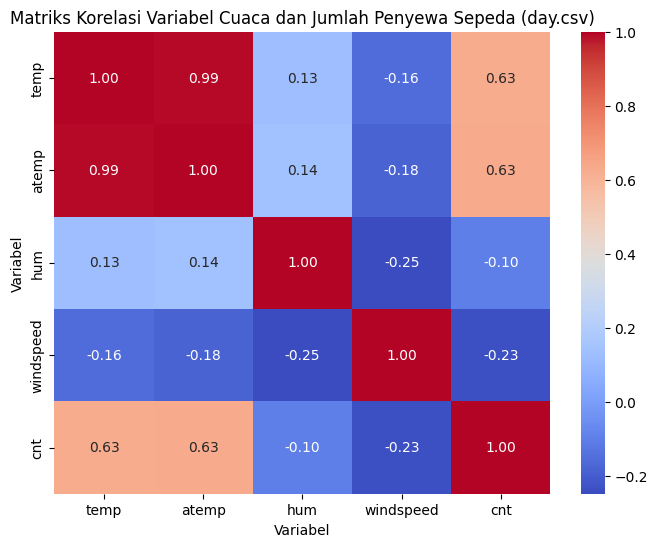

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik yang relevan buat korelasi
kolom_numerik = ["temp", "atemp", "hum", "windspeed", "cnt"]

# Hitung matriks korelasi
corr_matrix = df[kolom_numerik].corr()

# Visualisasikan heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Variabel Cuaca dan Jumlah Penyewa Sepeda (day.csv)")
plt.xlabel("Variabel")
plt.ylabel("Variabel")
plt.show()


5. membagi dataset untuk training dan test

In [27]:
from sklearn.model_selection import train_test_split
# Y = cnt (jumlah penyewa sepeda)
# X = variabel cuaca, suhu, dll yang kamu anggap berpengaruh
X = df[["temp", "atemp", "hum", "windspeed"]]
y = df["cnt"]

# 4. Split data menjadi data latih dan uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Tambahkan konstanta ke data latih
X_train_const = sm.add_constant(X_train)

# Cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

X_train_const.head()

Jumlah data train : 584
Jumlah data test  : 147


,const,temp,atemp,hum,windspeed
682,1.0,0.343333,0.323225,0.662917,0.342046
250,1.0,0.633913,0.555361,0.939565,0.192748
336,1.0,0.299167,0.310604,0.612917,0.095783
260,1.0,0.507500,0.490537,0.695000,0.178483
543,1.0,0.697500,0.640792,0.360000,0.271775


6. pemodelan

In [28]:
# Buat model OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_const).fit()

# Lihat parameter model
print(model.params)
print("\nPersamaan regresi linier:")
print(f"cnt = {model.params['const']:.3f} + {model.params['temp']:.3f}*temp + {model.params['atemp']:.3f}*atemp + {model.params['hum']:.3f}*hum + {model.params['windspeed']:.3f}*windspeed")


const        3739.977893
temp         2602.358162
atemp        4547.359927
hum         -3036.122982
windspeed   -3882.798294
dtype: float64

Persamaan regresi linier:
cnt = 3739.978 + 2602.358*temp + 4547.360*atemp + -3036.123*hum + -3882.798*windspeed


In [29]:
import statsmodels.api as sm

# Variabel dependen dan independen
X = df[["temp", "atemp", "hum", "windspeed"]]
y = df["cnt"]

# Split data (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tambahkan konstanta
X_train_const = sm.add_constant(X_train)

# Buat model OLS dan latih
model = sm.OLS(y_train, X_train_const).fit()

# Tampilkan parameter model
print('----------------------------')
print(model.params)
print('----------------------------')

# Simpan koefisien
const = model.params['const']
x1_temp = model.params['temp']
x2_atemp = model.params['atemp']
x3_hum = model.params['hum']
x4_wind = model.params['windspeed']

# Cetak persamaan regresi
print(f"Persamaan regresi:")
print(f"y = {const:.3f} + {x1_temp:.3f}*temp + {x2_atemp:.3f}*atemp + {x3_hum:.3f}*hum + {x4_wind:.3f}*windspeed")

----------------------------
const        3739.977893
temp         2602.358162
atemp        4547.359927
hum         -3036.122982
windspeed   -3882.798294
dtype: float64
----------------------------
Persamaan regresi:
y = 3739.978 + 2602.358*temp + 4547.360*atemp + -3036.123*hum + -3882.798*windspeed


analisis model


In [17]:
# Pengujian model dengan data testing
X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "temp": X_test["temp"],
    "atemp": X_test["atemp"],
    "hum": X_test["hum"],
    "windspeed": X_test["windspeed"],
    "cnt_aktual": y_test,
    "cnt_prediksi": y_pred
})

# Hitung selisih dan akurasi
hasil["selisih"] = hasil["cnt_prediksi"] - hasil["cnt_aktual"]
denom = hasil["cnt_aktual"].replace(0, np.nan)
hasil["akurasi (%)"] = (1 - (hasil["selisih"].abs() / denom)).clip(lower=0, upper=1) * 100

# Tampilkan hasil
hasil.head(10)


,temp,atemp,hum,windspeed,cnt_aktual,cnt_prediksi,selisih,akurasi (%)
703,0.475833,0.469054,0.733750,0.174129,6606,4207.360125,-2398.639875,63.689981
33,0.186957,0.177878,0.437826,0.277752,1550,2627.633685,1077.633685,30.475246
300,0.330833,0.318812,0.585833,0.229479,3747,3380.995059,-366.004941,90.232054
456,0.425833,0.417287,0.676250,0.172267,6041,4023.645878,-2017.354122,66.605626
633,0.550000,0.544179,0.570000,0.236321,7538,4997.675785,-2540.324215,66.299758
557,0.716667,0.650271,0.633333,0.151733,7264,6049.992887,-1214.007113,83.287347
39,0.134783,0.144283,0.494783,0.188839,1605,2511.392481,906.392481,43.526948
356,0.373333,0.377513,0.686250,0.274246,2209,3279.830263,1070.830263,51.524207
559,0.731667,0.667933,0.485833,0.080850,7499,6892.396262,-606.603738,91.910872
514,0.722500,0.672992,0.684583,0.295400,5743,5455.061722,-287.938278,94.986274


7. evaluasi model

In [11]:
# Evaluasi keseluruhan model
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")


R² Score: 0.4995
MSE: 2007059.4913


In [31]:
# tampilkam ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     118.6
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           7.75e-74
Time:                        16:22:50   Log-Likelihood:                -5067.4
No. Observations:                 584   AIC:                         1.014e+04
Df Residuals:                     579   BIC:                         1.017e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3739.9779    399.474      9.362      0.0

Visualisaasi

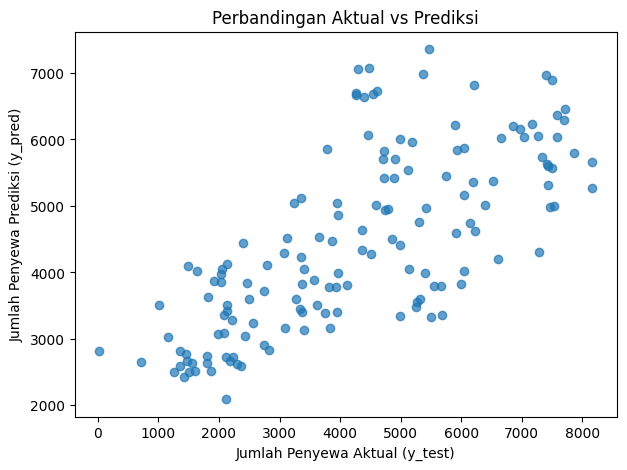

In [32]:
import matplotlib.pyplot as plt

# Tambahkan konstanta ke X_test
X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Jumlah Penyewa Aktual (y_test)")
plt.ylabel("Jumlah Penyewa Prediksi (y_pred)")
plt.title("Perbandingan Aktual vs Prediksi")
plt.show()
